In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import statsmodels.formula.api as smf

from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from scipy.special import expit
from scipy.stats import logistic

%matplotlib inline

In [81]:
nba = pd.read_csv("all_seasons.csv")
nba = nba.loc[:,"player_name":"season"]
nba["season"] = pd.to_datetime(nba["season"].str[:4])

In [82]:
nba

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-01-01
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-01-01
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-01-01
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-01-01
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,Maxi Kleber,DAL,28.0,208.28,108.862080,None,Germany,Undrafted,Undrafted,Undrafted,...,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-01-01
11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,35,...,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-01-01
11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,11,...,6.1,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-01-01
11143,Norvel Pelle,PHI,27.0,208.28,104.779752,None,USA,Undrafted,Undrafted,Undrafted,...,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-01-01


CREATE POSITIONS BASED ON HEIGHT

In [83]:
nba["position"] = ""
nba["position"][nba["player_height"] >= 209] = "Center"
nba["position"][nba["player_height"] <= 199] = "Guard"
nba["position"][(nba.player_height > 199)&(nba.player_height < 209 )] = "Forward"
nba

<ipython-input-83-d51621dc8b65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba["position"][nba["player_height"] >= 209] = "Center"
<ipython-input-83-d51621dc8b65>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba["position"][nba["player_height"] <= 199] = "Guard"
<ipython-input-83-d51621dc8b65>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba["position"][(nba.player_height > 199)&(nba.player_height < 209 )] = "Forward"


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,position
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-01-01,Guard
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-01-01,Center
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-01-01,Forward
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-01-01,Forward
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-01-01,Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,Maxi Kleber,DAL,28.0,208.28,108.862080,None,Germany,Undrafted,Undrafted,Undrafted,...,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-01-01,Forward
11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,35,...,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-01-01,Guard
11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,11,...,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-01-01,Center
11143,Norvel Pelle,PHI,27.0,208.28,104.779752,None,USA,Undrafted,Undrafted,Undrafted,...,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-01-01,Forward


GROUP BY CENTER

In [84]:
center = nba["position"] == "Center"
center_usg = nba[center]
center_usg2 = center_usg.groupby("season").mean()["usg_pct"]

Text(0, 0.5, 'USG%')

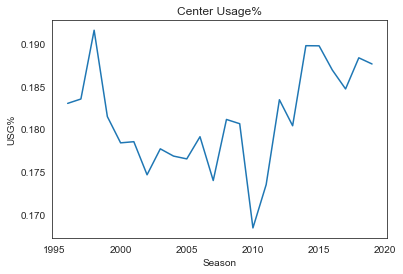

In [85]:
year_list = []
for i in range(1996,2020,1):
    year_list.append(i)
sns.lineplot(x=year_list,y=center_usg2)
plt.title("Center Usage%")
plt.xlabel("Season")
plt.ylabel("USG%")

GROUP BY GUARD

In [86]:
guard = nba["position"] == "Guard"
guard_reb = nba[guard]
guard_reb_o = guard_reb.groupby("season").mean()["oreb_pct"]
guard_reb_d = guard_reb.groupby("season").mean()["dreb_pct"]

Text(0, 0.5, 'DEF REB%')

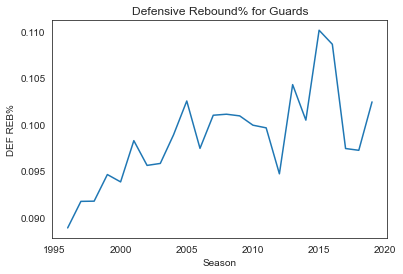

In [87]:
sns.lineplot(x=year_list,y=guard_reb_d)
plt.title("Defensive Rebound% for Guards")
plt.xlabel("Season")
plt.ylabel("DEF REB%")

Text(0, 0.5, 'OFF REB%')

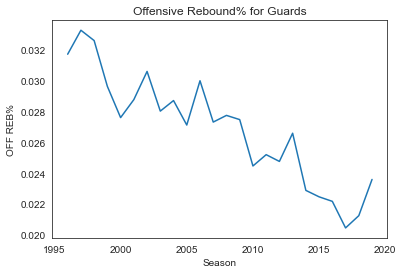

In [88]:
sns.lineplot(x=year_list,y=guard_reb_o)
plt.title("Offensive Rebound% for Guards")
plt.xlabel("Season")
plt.ylabel("OFF REB%")

In [89]:
nba_2019_20 = nba["season"].dt.year == 2019
current_nba = nba[nba_2019_20]

Text(15.998333333333342, 0.5, 'Count')

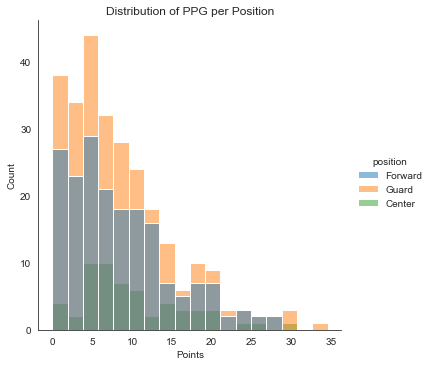

In [90]:
sns.displot(x="pts",data=current_nba,hue="position")
plt.title("Distribution of PPG per Position")
plt.xlabel("Points")
plt.ylabel("Count")

Text(9.550000000000004, 0.5, 'Points')

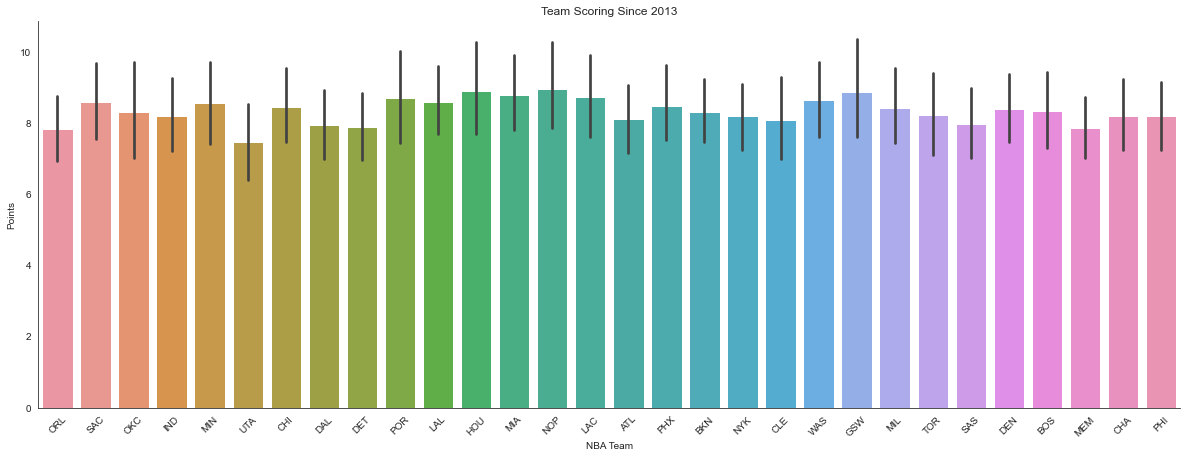

In [91]:
recent_decade = nba["season"].dt.year >= 2013
decade_nba = nba[recent_decade]
sns.color_palette("crest", as_cmap=True)
g=sns.catplot(x = "team_abbreviation", y = "pts", kind = "bar", data = decade_nba)
g.fig.set_size_inches(18,6)
plt.xticks(rotation=45)
plt.title("Team Scoring Since 2013")
plt.xlabel("NBA Team")
plt.ylabel("Points")

Text(12.690694444444453, 0.5, 'Assists')

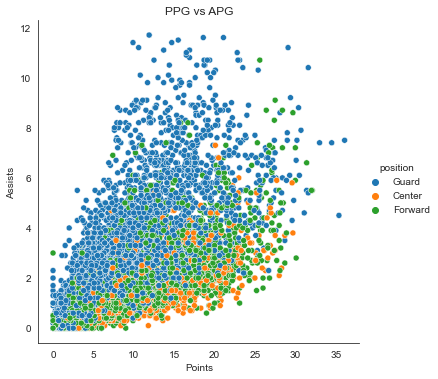

In [92]:
sns.relplot(x="pts",y="ast",data=nba,hue="position")
plt.title("PPG vs APG")
plt.xlabel("Points")
plt.ylabel("Assists")

Text(12.690694444444453, 0.5, 'Assists')

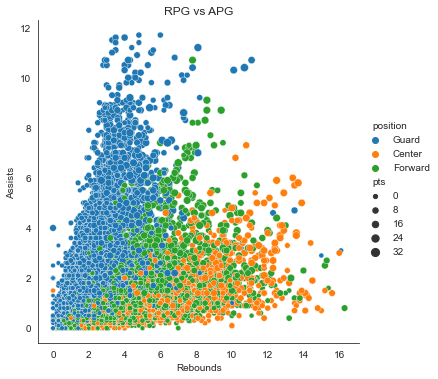

In [93]:
sns.set_style("ticks")
sns.set_style("white")
sns.relplot(x="reb",y="ast",data=nba,hue="position",size="pts")
plt.title("RPG vs APG")
plt.xlabel("Rebounds")
plt.ylabel("Assists")

## LOGISTIC REGRESSION

DETERMINE IF CENTER

In [94]:
def big_man(x):
  if x == "Center":
    return 1
  else:
    return 0

In [95]:
nba["is_center"] = nba["position"].apply(big_man)

SET VARIABLES

In [96]:
x = nba[["reb","pts","ast","usg_pct","ts_pct"]]
y = nba["is_center"]

TEST VARIABLES W/ STATS MODEL BEFORE TRAIN-TEST-SPLIT

In [97]:
logit_model = smf.logit("is_center ~ reb + pts + ast + usg_pct + ts_pct",data=nba).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.357965
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              is_center   No. Observations:                11145
Model:                          Logit   Df Residuals:                    11139
Method:                           MLE   Df Model:                            5
Date:                Tue, 13 Apr 2021   Pseudo R-squ.:                  0.2351
Time:                        18:58:52   Log-Likelihood:                -3989.5
converged:                       True   LL-Null:                       -5215.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2506      0.210    -15.496      0.000      -3.662      -2.839
reb            0.5935      0.019     31.650      0.000       0.557       0.630
pts           -0.1624      0.014    -11.798      0.000      -0.189      -0.135
ast           -0.7868      0.048    -16.379      0.000      -0.881      -0.693
usg_pct        6.5688      0.711      9.241      0.000       5.176       7.962
ts_pct         0.7275      0.314      2.316      0.021       0.112       1.343
==============================================================================
"""

In [120]:
confusion_matrix = logit_model.pred_table()
confusion_matrix

array([[8801.,  363.],
       [1550.,  431.]])

SPLIT INTO TRAINING AND TESTING DATA

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

CREATE MODEL AND FIT TO TRAINING DATA

In [99]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

MAKE PREDICTIONS AND EVALUATE

In [100]:
predictions = logmodel.predict(x_test)

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2296
           1       0.62      0.21      0.32       491

    accuracy                           0.84      2787
   macro avg       0.73      0.59      0.61      2787
weighted avg       0.81      0.84      0.80      2787



REPEAT WITH DIFFERENT INDEPENDENT VARIABLES

In [102]:
x = nba[["reb","pts","ast","usg_pct","ts_pct","oreb_pct","dreb_pct","player_weight"]]
y = nba["is_center"]

In [107]:
logit_model2 = smf.logit("is_center ~ reb + pts + ast + usg_pct + ts_pct + oreb_pct + dreb_pct + player_weight",data=nba).fit()
logit_model2.summary()

Optimization terminated successfully.
         Current function value: 0.298256
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              is_center   No. Observations:                11145
Model:                          Logit   Df Residuals:                    11136
Method:                           MLE   Df Model:                            8
Date:                Tue, 13 Apr 2021   Pseudo R-squ.:                  0.3626
Time:                        19:00:21   Log-Likelihood:                -3324.1
converged:                       True   LL-Null:                       -5215.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -15.9832      0.490    -32.602      0.000     -16.944     -15.022
reb               0.2285      0.027      8.536      0.000       0.176       0.281
pts              -0.0776      0.016     -4.753      0.000      -0.110      -0.046
ast              -0.3293      0.050     -6.556      0.000      -0.428      -0.231
usg_pct           2.7012      0.869      3.109      0.002       0.998       4.404
ts_pct            0.7210      0.353      2.044      0.041       0.030       1.412
oreb_pct          0.5603      0.858      0.653      0.514      -1.122       2.243
dreb_pct          3.9396      0.663      5.940      0.000       2.640       5.239
player_weight     0.1212      0.004     29.431      0.000       0.113       0.129
=================================================================================
"""

In [119]:
confusion_matrix = logit_model2.pred_table()
confusion_matrix

array([[8646.,  518.],
       [1167.,  814.]])

In [108]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [109]:
logmodel2 = LogisticRegression()
logmodel2.fit(x_train,y_train)

/Users/henryovalle/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
new_predict = logmodel2.predict(x_test)

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test,new_predict))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2261
           1       0.64      0.38      0.48       526

    accuracy                           0.84      2787
   macro avg       0.76      0.67      0.69      2787
weighted avg       0.83      0.84      0.83      2787



REPEAT ONCE MORE WITHOUT OFFENSIVE REBOUNDING

In [112]:
x = nba[["reb","pts","ast","usg_pct","ts_pct","dreb_pct","player_weight"]]
y = nba["is_center"]

In [113]:
logit_model3 = smf.logit("is_center ~ reb + pts + ast + usg_pct + ts_pct + dreb_pct + player_weight",data=nba).fit()
logit_model3.summary()

Optimization terminated successfully.
         Current function value: 0.298275
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              is_center   No. Observations:                11145
Model:                          Logit   Df Residuals:                    11137
Method:                           MLE   Df Model:                            7
Date:                Tue, 13 Apr 2021   Pseudo R-squ.:                  0.3626
Time:                        19:02:13   Log-Likelihood:                -3324.3
converged:                       True   LL-Null:                       -5215.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -16.0219      0.487    -32.923      0.000     -16.976     -15.068
reb               0.2358      0.024      9.674      0.000       0.188       0.284
pts              -0.0808      0.016     -5.180      0.000      -0.111      -0.050
ast              -0.3355      0.049     -6.784      0.000      -0.432      -0.239
usg_pct           2.8026      0.856      3.276      0.001       1.126       4.480
ts_pct            0.7401      0.351      2.108      0.035       0.052       1.428
dreb_pct          3.9266      0.663      5.923      0.000       2.627       5.226
player_weight     0.1217      0.004     30.100      0.000       0.114       0.130
=================================================================================
"""

In [118]:
confusion_matrix = logit_model3.pred_table()
confusion_matrix

array([[8651.,  513.],
       [1166.,  815.]])

In [114]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [115]:
logmodel2 = LogisticRegression()
logmodel2.fit(x_train,y_train)

/Users/henryovalle/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [116]:
new_predict = logmodel2.predict(x_test)

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test,new_predict))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2287
           1       0.57      0.42      0.48       500

    accuracy                           0.84      2787
   macro avg       0.73      0.68      0.69      2787
weighted avg       0.83      0.84      0.83      2787



## K-NEAREST NEIGHBORS REGRESSION

FILTER DATA FOR PLAYERS AVERAGING AT LEAST 2.0 POINTS

In [127]:
new_nba = nba.drop(columns = ["player_name", "team_abbreviation","age","college","country","draft_year","draft_round","draft_number","is_center","position","net_rating"])
pts_filter = new_nba["pts"] >= 2.0
nba_pts = new_nba[pts_filter]
nba_pts["year"] = nba_pts["season"].dt.year
nba_pts.drop(columns = ["season"], inplace = True)
nba_pts

<ipython-input-127-42962df2f8a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_pts["year"] = nba_pts["season"].dt.year
/Users/henryovalle/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,player_height,player_weight,gp,pts,reb,ast,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,year
0,198.12,99.790240,55,5.7,16.1,3.1,0.186,0.323,0.100,0.479,0.113,1996
1,215.90,117.933920,15,2.3,1.5,0.3,0.078,0.151,0.175,0.430,0.048,1996
3,203.20,100.697424,64,3.7,2.3,0.6,0.060,0.149,0.167,0.399,0.077,1996
4,205.74,108.862080,27,2.4,2.4,0.2,0.109,0.179,0.127,0.611,0.040,1996
5,200.66,97.522280,52,8.2,2.7,1.0,0.034,0.126,0.220,0.541,0.102,1996
...,...,...,...,...,...,...,...,...,...,...,...,...
11139,195.58,97.522280,2,2.5,0.5,0.0,0.167,0.000,0.158,0.727,0.000,2019
11140,208.28,108.862080,63,9.1,5.4,1.1,0.056,0.140,0.136,0.605,0.064,2019
11142,213.36,117.933920,49,6.1,5.1,1.1,0.029,0.217,0.120,0.640,0.076,2019
11143,208.28,104.779752,20,2.1,3.0,0.4,0.085,0.237,0.126,0.521,0.056,2019


CREATE VARIABLES FOR SPLIT

In [129]:
x = nba_pts.drop(columns = ["pts"])
y = nba_pts["pts"]

0        5.7
1        2.3
3        3.7
4        2.4
5        8.2
        ... 
11139    2.5
11140    9.1
11142    6.1
11143    2.1
11144    4.5
Name: pts, Length: 9963, dtype: float64

In [130]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [132]:
scaler = MinMaxScaler()

In [133]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

CREATE KNN MODEL AND EVALUATE MSE VALUES FOR DIFFERENT K-VALUES

In [143]:
mses = []
for k in range(5,16):
    print("Now computing MSE for k= ",k)
    iknn_scaled = KNeighborsRegressor(n_neighbors = k)
    iknn_scaled.fit(x_train_scaled, y_train)
    iy_pred_scaled = iknn_scaled.predict(x_test_scaled)
    mse = mean_squared_error(iy_pred_scaled, y_test)
    mses.append(mse)

Now computing MSE for k=  5
Now computing MSE for k=  6
Now computing MSE for k=  7
Now computing MSE for k=  8
Now computing MSE for k=  9
Now computing MSE for k=  10
Now computing MSE for k=  11
Now computing MSE for k=  12
Now computing MSE for k=  13
Now computing MSE for k=  14
Now computing MSE for k=  15


Text(0.5, 1.0, 'MSE for different numbers of neighbors')

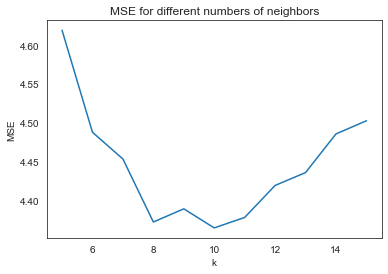

In [146]:
x = [5,6,7,8,9,10,11,12,13,14,15]
plt.plot(x,mses)
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("MSE for different numbers of neighbors")